In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os
import pandas as pd
from scipy.odr import *

plt.rcParams.update({'font.size': 16})

In [29]:
# define data
v = pd.read_csv("V_piecewise.csv", index_col=0) # turn on voltage in volts
v = v.sort_values(by=['V0'])
y = v["V0"]
y_err = v["V0_uncert"]

w = pd.read_csv("wavelengths.csv", index_col=0) # wavelengths in nanometers

c = 3e17
x = c/w["w"]
x_err = c/w["w"]**2 * w["w_uncert"]

Beta: [ 3.42428564e-15 -1.10000730e-01]
Beta Std Error: [2.51541681e-16 1.32897004e-01]
Beta Covariance: [[ 1.75076710e-31 -9.15774718e-17]
 [-9.15774718e-17  4.88696065e-02]]
Residual Variance: 0.3614028230369336
Inverse Condition #: 7.992136889798438e-14
Reason(s) for Halting:
  Sum of squares convergence


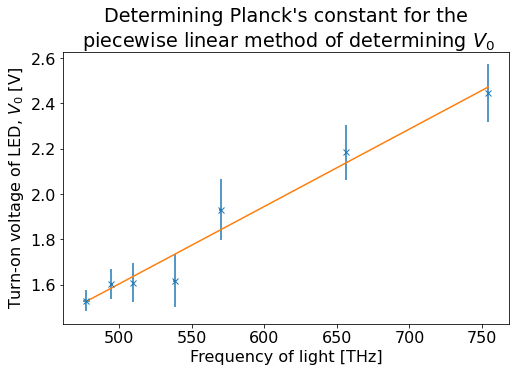

In [37]:
# https://stackoverflow.com/questions/22670057/linear-fitting-in-python-with-uncertainty-in-both-x-and-y-coordinates
# Define linear function
def linear(p, x):
    m, c = p
    return m*x + c

# Create a model for fitting.
model = Model(linear)

# Create a RealData object using our initiated data
data = RealData(x, y, sx=x_err, sy=y_err)

# Set up ODR with the model and data.
odr = ODR(data, model, beta0=[1., 300.])

# Run the regression.
out = odr.run()

# Use the in-built pprint method to give us results.
out.pprint()

x_fit = np.linspace(x[0], x[-1], 1000)
y_fit = linear(out.beta, x_fit)

plt.figure(figsize=(8,5))
plt.errorbar(x/1e12, y, xerr=x_err/1e12, yerr=y_err, linestyle='None', marker='x')
plt.plot(x_fit/1e12, y_fit)
plt.title("Determining Planck's constant for the\n piecewise linear method of determining $V_0$")
plt.ylabel("Turn-on voltage of LED, $V_0$ [V]")
plt.xlabel("Frequency of light [THz]")

plt.show()